In [108]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import tensorflow_probability as tfp
import d2l.tensorflow as d2l

In [40]:
def print_tensor(x):
    print(x)
    print(x.shape)

In [41]:
x = tf.range(12)
print_tensor(x)

tf.Tensor([ 0  1  2  3  4  5  6  7  8  9 10 11], shape=(12,), dtype=int32)
(12,)


In [42]:
print_tensor(tf.reshape(x, (3, 4)))

tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
(3, 4)


In [43]:
print_tensor(tf.reshape(x, (3, -1)))

tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
(3, 4)


In [44]:
print_tensor(tf.zeros((2, 3, 4)))

tf.Tensor(
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]], shape=(2, 3, 4), dtype=float32)
(2, 3, 4)


In [45]:
print_tensor(tf.ones((2, 3, 4)))

tf.Tensor(
[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]], shape=(2, 3, 4), dtype=float32)
(2, 3, 4)


In [46]:
print_tensor(tf.random.normal(shape=[3, 4]))

tf.Tensor(
[[ 0.9467958  -0.50667316 -0.13251051 -1.5174341 ]
 [-0.39561546 -0.57632405  0.38594595 -1.8558823 ]
 [ 1.0106536   1.117708    0.80902666 -0.33923778]], shape=(3, 4), dtype=float32)
(3, 4)


In [47]:
print_tensor(tf.constant([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]))

tf.Tensor(
[[2 1 4 3]
 [1 2 3 4]
 [4 3 2 1]], shape=(3, 4), dtype=int32)
(3, 4)


In [48]:
x = tf.constant([1.0, 2, 4, 8])
y = tf.constant([2.0, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 3.,  4.,  6., 10.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1.,  0.,  2.,  6.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 2.,  4.,  8., 16.], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.5, 1. , 2. , 4. ], dtype=float32)>,
 <tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 1.,  4., 16., 64.], dtype=float32)>)

In [49]:
tf.exp(x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=
array([2.7182817e+00, 7.3890562e+00, 5.4598148e+01, 2.9809580e+03],
      dtype=float32)>

In [50]:
x = tf.reshape(tf.range(12, dtype=tf.float32), (3, 4))
y = tf.constant([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
tf.concat([x, y], axis=0), tf.concat([x, y], axis=1)

(<tf.Tensor: shape=(6, 4), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]], dtype=float32)>,
 <tf.Tensor: shape=(3, 8), dtype=float32, numpy=
 array([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]], dtype=float32)>)

In [51]:
x == y

<tf.Tensor: shape=(3, 4), dtype=bool, numpy=
array([[False,  True, False,  True],
       [False, False, False, False],
       [False, False, False, False]])>

In [52]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=66.0>

In [53]:
def mkdir_if_not_exist(path):  #@save
    """Make a directory if it does not exist."""
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

In [54]:
data_file = './data/house_tiny.csv'
mkdir_if_not_exist('./data')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data point
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [55]:
data = pd.read_csv(data_file)
print(data)

NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [56]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [57]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


In [58]:
X, y = tf.constant(inputs.values), tf.constant(outputs.values)
X, y

(<tf.Tensor: shape=(4, 3), dtype=float64, numpy=
 array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]])>,
 <tf.Tensor: shape=(4,), dtype=int64, numpy=array([127500, 106000, 178100, 140000])>)

In [59]:
A= tf.reshape(tf.range(12),(4,3))
A

<tf.Tensor: shape=(4, 3), dtype=int32, numpy=
array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int32)>

In [60]:
tf.transpose(tf.transpose(A)) == A

<tf.Tensor: shape=(4, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])>

In [61]:
A= tf.reshape(tf.range(24),(2,3,4))
len(A)

2

In [62]:
np.linalg.norm(A)

65.75712889109438

In [63]:
tf.reduce_sum(A,axis=0)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]], dtype=int32)>

In [64]:
tf.reduce_sum(A,axis=1)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[12, 15, 18, 21],
       [48, 51, 54, 57]], dtype=int32)>

In [65]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [66]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [69]:
x = tf.range(4, dtype=tf.float32)
x

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 1., 2., 3.], dtype=float32)>

In [70]:
x = tf.Variable(x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  1.,  8., 81.], dtype=float32)>

In [89]:
with tf.GradientTape(persistent=True) as t:
    y = 2 * x * x * x
y

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.,  2., 16., 54.], dtype=float32)>

In [91]:
print(t.gradient(y, x))


tf.Tensor([ 0.  6. 24. 54.], shape=(4,), dtype=float32)
tf.Tensor([ 0.  6. 24. 54.], shape=(4,), dtype=float32)


In [80]:
with tf.GradientTape() as t:
    y = tf.reduce_sum(x)
t.gradient(y, x)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

In [95]:
with tf.GradientTape() as t2:
  with tf.GradientTape() as t1:
    y = x * x * x

dy_dx = t1.gradient(y, x)
d2y_dx2 = t2.gradient(dy_dx, x)
print(dy_dx)
print(d2y_dx2)

tf.Tensor([ 0.  3. 12. 27.], shape=(4,), dtype=float32)
None


In [102]:
fair_probs = tf.ones(6) / 6
sample_size = 1000
samples = tfp.distributions.Multinomial(sample_size, fair_probs).sample()
print(samples/sample_size)

tf.Tensor([0.161 0.181 0.16  0.154 0.189 0.155], shape=(6,), dtype=float32)


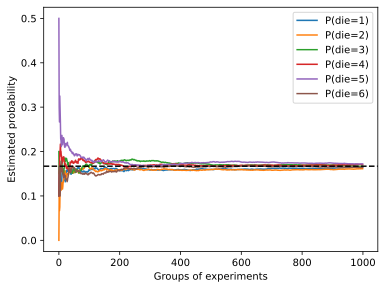

In [112]:
counts = tfp.distributions.Multinomial(10, fair_probs).sample(1000)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()